In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import missingno as msno


In [2]:
dataset = pd.read_csv('../../../stefan.nedelkovski/Treatment Episode Data Set: Discharges (TEDS-D)/tedsd_data_2017.csv')

In [3]:
dataset.shape

(1661207, 76)

In [4]:
dataset.dtypes

DISYR       int64
CASEID      int64
STFIPS      int64
CBSA2010    int64
EDUC        int64
            ...  
OTHERFLG    int64
DIVISION    int64
REGION      int64
IDU         int64
ALCDRUG     int64
Length: 76, dtype: object

In [5]:
dataset.columns

Index(['DISYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'SERVICES_D',
       'REASON', 'EMPLOY_D', 'LIVARAG_D', 'ARRESTS_D', 'DSMCRIT', 'AGE',
       'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2',
       'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'ROUTE1', 'ROUTE2', 'ROUTE3',
       'FREQ1', 'FREQ2', 'FREQ3', 'FREQ1_D', 'FREQ2_D', 'FREQ3_D', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG',
       'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG',
       'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

In [6]:
dataset.head(10)

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2017,20171488889,2,-9,3,1,7,-9,36,6,...,0,0,0,0,0,0,9,4,-9,1
1,2017,20171398230,2,-9,3,4,7,-9,37,1,...,0,0,0,0,0,1,9,4,0,3
2,2017,20171376355,2,-9,3,4,7,-9,36,3,...,0,0,0,0,0,0,9,4,-9,2
3,2017,20171340949,2,-9,5,1,7,2,33,7,...,0,0,0,0,0,0,9,4,-9,1
4,2017,20171412960,2,-9,3,4,7,3,32,7,...,0,0,0,0,0,0,9,4,-9,3
5,2017,20171574196,2,-9,3,1,7,1,36,7,...,0,0,0,0,0,0,9,4,-9,3
6,2017,20171311987,2,-9,3,2,7,-9,36,1,...,0,0,0,0,0,0,9,4,-9,1
7,2017,20171428257,2,-9,2,2,7,-9,33,1,...,0,0,0,0,0,1,9,4,-9,3
8,2017,20171514212,2,-9,2,2,7,-9,33,1,...,0,0,0,0,0,0,9,4,-9,1
9,2017,20171388175,2,-9,3,1,7,-9,36,1,...,0,0,0,0,0,0,9,4,-9,3


In [7]:
dataset = dataset.replace({-9: 'NaN'})

In [8]:
def NaN_percent(dataset, column_name):
    row_count = dataset[column_name].shape[0]
    empty_values = row_count - dataset[column_name].count() #gives us the quantity of non-empty rows
    non_empty_values = row_count - len(dataset[dataset[column_name] == 'NaN'])
    empty_values = row_count - non_empty_values
    return (100.0*empty_values)/row_count

for i in list(dataset):
    print(i +': ' + str(NaN_percent(dataset,i))+'%') 

DISYR: 0.0%
CASEID: 0.0%
STFIPS: 0.0%
CBSA2010: 31.381218595876373%
EDUC: 3.028219842560259%
MARSTAT: 23.827012527638036%
SERVICES: 0.0%
DETCRIM: 79.00189440569417%
LOS: 0.0%
PSOURCE: 2.2291622898290218%
NOPRIOR: 8.627100656330006%
ARRESTS: 11.79275069271921%
EMPLOY: 2.6220091776641925%
METHUSE: 4.497332361349308%
PSYPROB: 13.811583986824038%
PREG: 67.92970412477193%
GENDER: 0.024861441108784157%
VET: 8.439887383089525%
LIVARAG: 4.19592501115153%
DAYWAIT: 45.74432927383523%
SERVICES_D: 0.0%
REASON: 0.0%
EMPLOY_D: 15.739459320843219%
LIVARAG_D: 16.37279399858055%
ARRESTS_D: 16.61087390072399%
DSMCRIT: 41.2914224416343%
AGE: 0.0%
RACE: 1.5072173425707933%
ETHNIC: 2.1537954029810855%
DETNLF: 72.33493477935019%
DETNLF_D: 78.12680779698135%
PRIMINC: 42.34065953249655%
SUB1: 1.0256397908267905%
SUB2: 2.9367201077288985%
SUB3: 15.572713093551856%
SUB1_D: 7.0955636473961405%
SUB2_D: 5.465544029130626%
SUB3_D: 10.005014426257535%
ROUTE1: 2.932024726599394%
ROUTE2: 44.141398392855315%
ROUTE3: 78

In [8]:
dataset = dataset.replace({'NaN': np.nan})

In [9]:
veterans = dataset[(dataset['VET'] == 1) | (dataset['VET'] == 2)]

In [10]:
veterans

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2017.0,2.017149e+10,2.0,NaN,3.0,1.0,7.0,NaN,36.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,1.0
2,2017.0,2.017138e+10,2.0,NaN,3.0,4.0,7.0,NaN,36.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,2.0
3,2017.0,2.017134e+10,2.0,NaN,5.0,1.0,7.0,2.0,33.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,1.0
4,2017.0,2.017141e+10,2.0,NaN,3.0,4.0,7.0,3.0,32.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,3.0
6,2017.0,2.017131e+10,2.0,NaN,3.0,2.0,7.0,NaN,36.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661202,2017.0,2.017160e+10,56.0,NaN,3.0,1.0,6.0,1.0,35.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,NaN,1.0
1661203,2017.0,2.017164e+10,56.0,NaN,4.0,1.0,7.0,NaN,34.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,NaN,1.0
1661204,2017.0,2.017150e+10,56.0,NaN,3.0,1.0,7.0,3.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,NaN,3.0
1661205,2017.0,2.017135e+10,56.0,NaN,3.0,1.0,7.0,3.0,35.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,NaN,2.0


In [11]:
npt_veterans = veterans[veterans['NOPRIOR'] == 0]

In [12]:
npt_veterans 

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
3,2017.0,2.017134e+10,2.0,NaN,5.0,1.0,7.0,2.0,33.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,1.0
6,2017.0,2.017131e+10,2.0,NaN,3.0,2.0,7.0,NaN,36.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,1.0
7,2017.0,2.017143e+10,2.0,NaN,2.0,2.0,7.0,NaN,33.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,NaN,3.0
8,2017.0,2.017151e+10,2.0,NaN,2.0,2.0,7.0,NaN,33.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,1.0
12,2017.0,2.017134e+10,2.0,NaN,3.0,1.0,6.0,NaN,37.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661202,2017.0,2.017160e+10,56.0,NaN,3.0,1.0,6.0,1.0,35.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,NaN,1.0
1661203,2017.0,2.017164e+10,56.0,NaN,4.0,1.0,7.0,NaN,34.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,NaN,1.0
1661204,2017.0,2.017150e+10,56.0,NaN,3.0,1.0,7.0,3.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,NaN,3.0
1661205,2017.0,2.017135e+10,56.0,NaN,3.0,1.0,7.0,3.0,35.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,NaN,2.0


In [13]:
npt_veterans = npt_veterans.drop(columns=['FREQ_ATND_SELF_HELP','PRIMINC','FREQ_ATND_SELF_HELP_D','EMPLOY_D','DETNLF','DETNLF_D','LIVARAG_D','ARRESTS_D','DIVISION','SERVICES_D','PSOURCE','SUB1_D','SUB2','SUB2_D', 'SUB3','SUB3_D','FREQ3','HLTHINS','PREG', 'ROUTE2', 'ROUTE3', 'FREQ2','FREQ2_D', 'FREQ3_D','FRSTUSE2', 'FRSTUSE3', 'PRIMPAY', 'DETCRIM', 'CBSA2010', 'IDU']) 

In [14]:
npt_veterans

,DISYR,CASEID,STFIPS,EDUC,MARSTAT,SERVICES,LOS,NOPRIOR,ARRESTS,EMPLOY,...,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,REGION,ALCDRUG
3,2017.0,2.017134e+10,2.0,5.0,1.0,7.0,33.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
6,2017.0,2.017131e+10,2.0,3.0,2.0,7.0,36.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
7,2017.0,2.017143e+10,2.0,2.0,2.0,7.0,33.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0
8,2017.0,2.017151e+10,2.0,2.0,2.0,7.0,33.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
12,2017.0,2.017134e+10,2.0,3.0,1.0,6.0,37.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661202,2017.0,2.017160e+10,56.0,3.0,1.0,6.0,35.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
1661203,2017.0,2.017164e+10,56.0,4.0,1.0,7.0,34.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
1661204,2017.0,2.017150e+10,56.0,3.0,1.0,7.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0
1661205,2017.0,2.017135e+10,56.0,3.0,1.0,7.0,35.0,0.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0


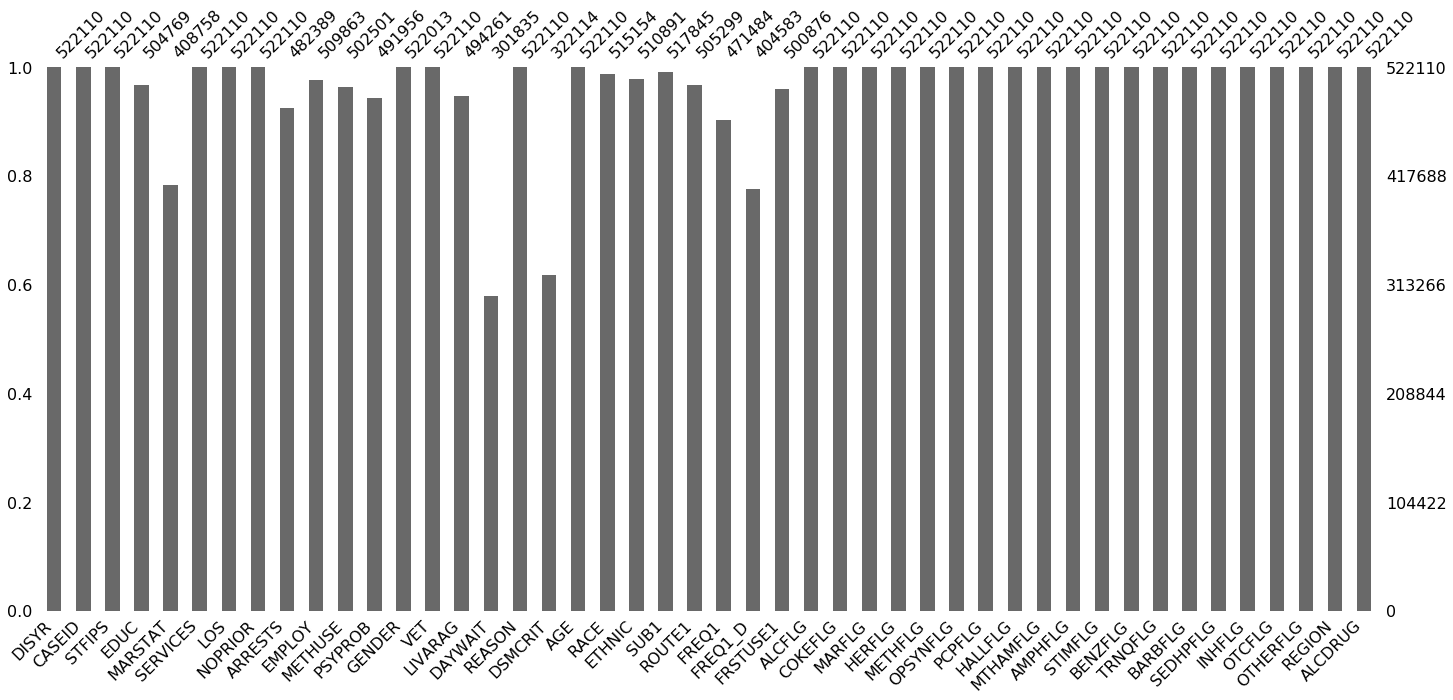

In [15]:
msno.bar(npt_veterans)

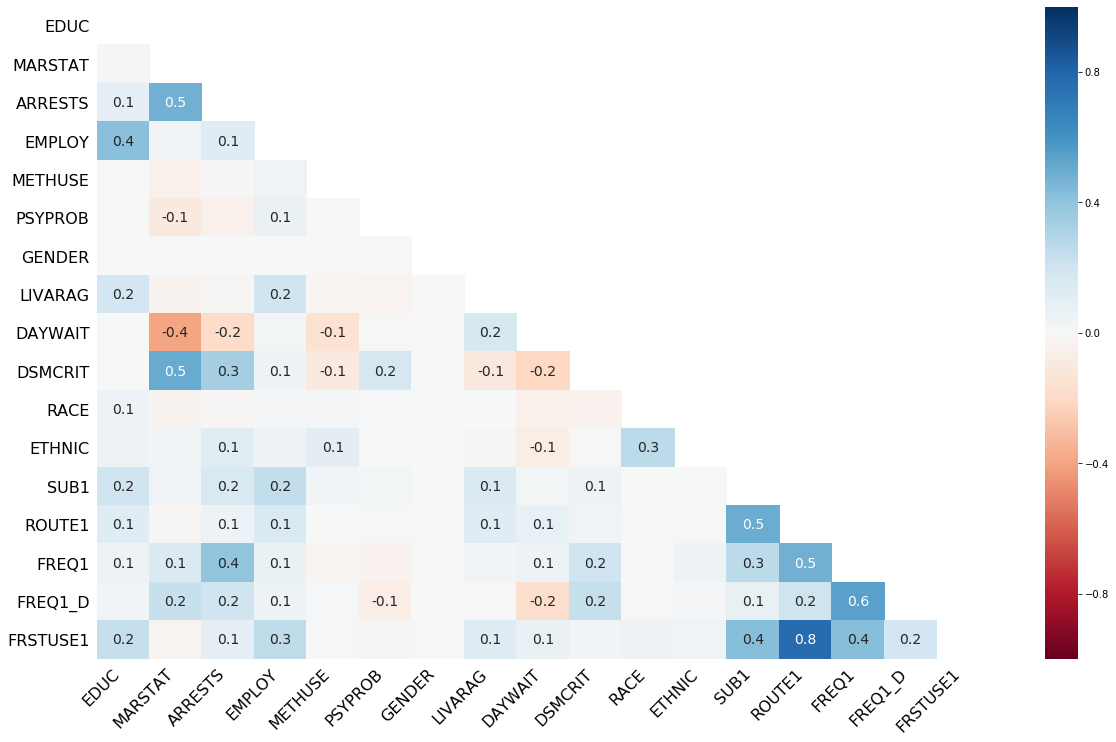

In [16]:
 msno.heatmap(npt_veterans) #-1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

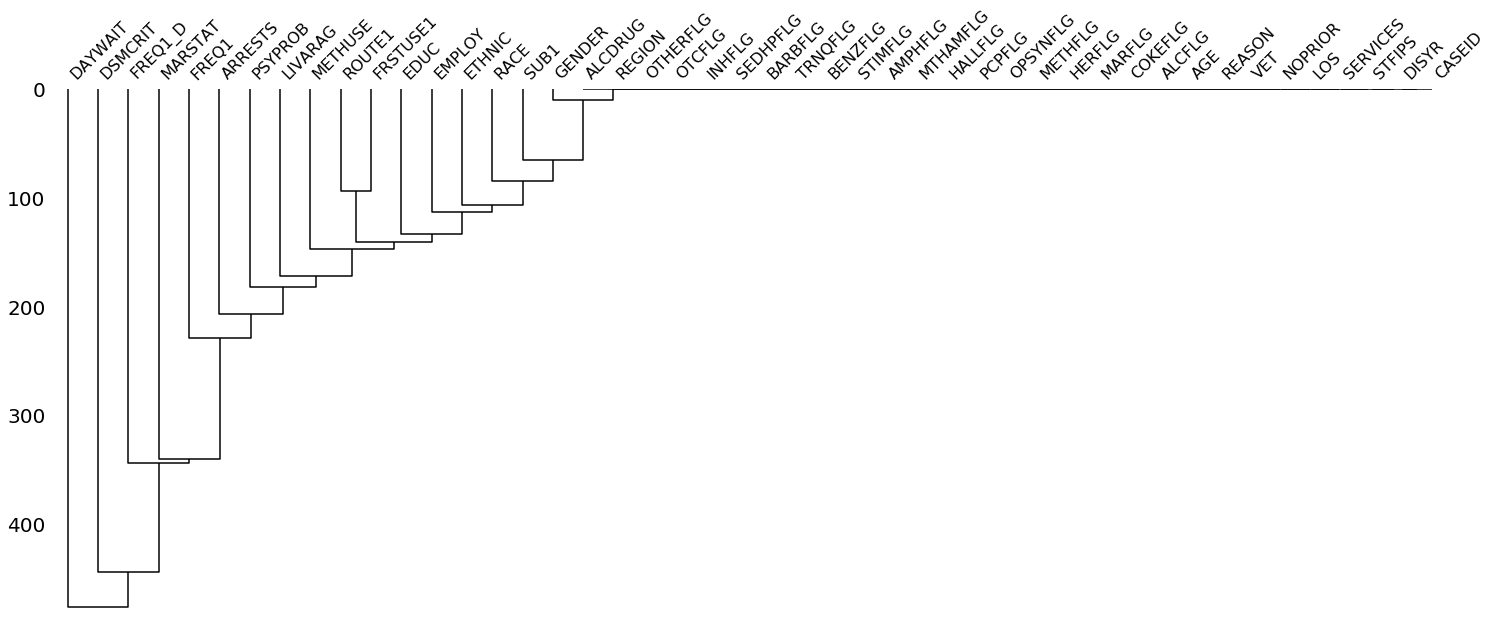

In [17]:
msno.dendrogram(npt_veterans)

In [18]:
for x in range(46):
    nptv_check = npt_veterans.dropna(thresh=x)
    print(x," variables = ",nptv_check.shape)

0  variables =  (522110, 46)
1  variables =  (522110, 46)
2  variables =  (522110, 46)
3  variables =  (522110, 46)
4  variables =  (522110, 46)
5  variables =  (522110, 46)
6  variables =  (522110, 46)
7  variables =  (522110, 46)
8  variables =  (522110, 46)
9  variables =  (522110, 46)
10  variables =  (522110, 46)
11  variables =  (522110, 46)
12  variables =  (522110, 46)
13  variables =  (522110, 46)
14  variables =  (522110, 46)
15  variables =  (522110, 46)
16  variables =  (522110, 46)
17  variables =  (522110, 46)
18  variables =  (522110, 46)
19  variables =  (522110, 46)
20  variables =  (522110, 46)
21  variables =  (522110, 46)
22  variables =  (522110, 46)
23  variables =  (522110, 46)
24  variables =  (522110, 46)
25  variables =  (522110, 46)
26  variables =  (522110, 46)
27  variables =  (522110, 46)
28  variables =  (522110, 46)
29  variables =  (522110, 46)
30  variables =  (522110, 46)
31  variables =  (522107, 46)
32  variables =  (522103, 46)
33  variables =  (52

In [19]:
#cleaning the data
print("Count before cleaning",npt_veterans.shape)
npt_veterans_c = npt_veterans.dropna(thresh=33)
print("Count after cleaning",npt_veterans_c.shape)

Count before cleaning (522110, 46)
Count after cleaning (522077, 46)


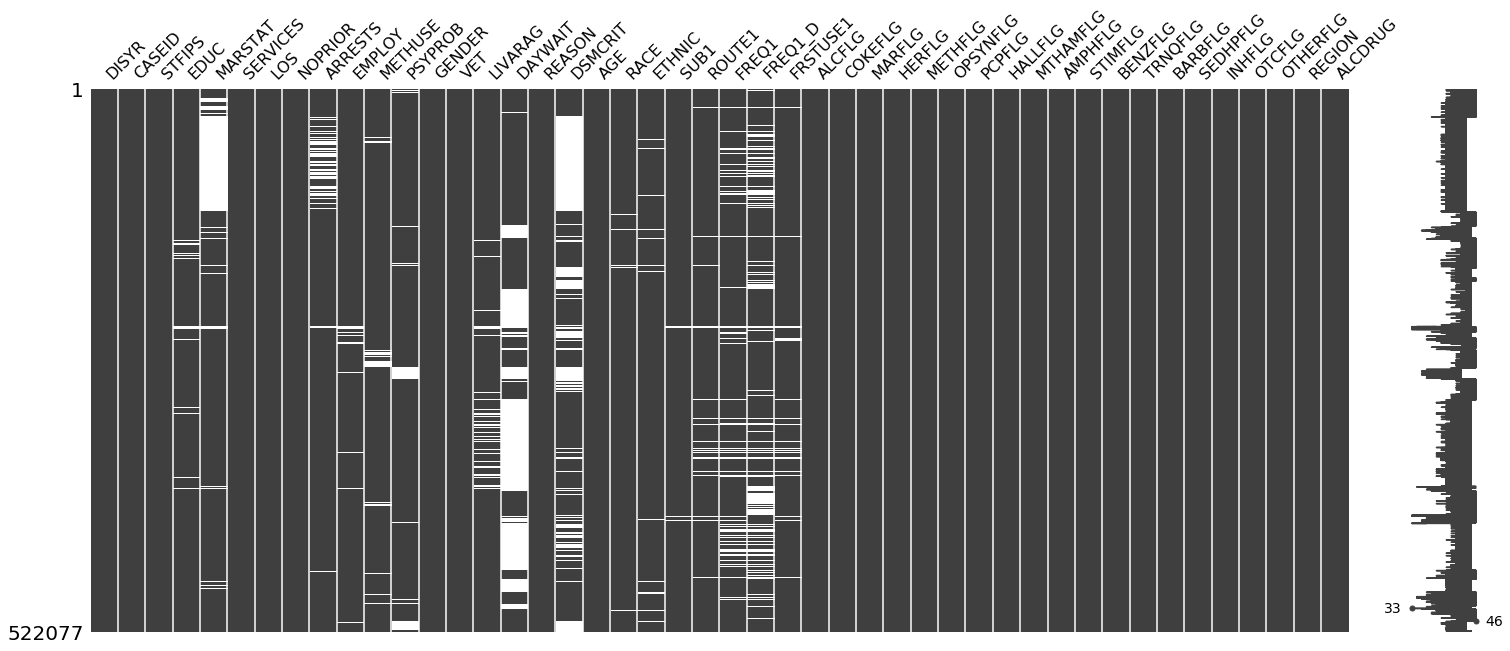

In [20]:
msno.matrix(npt_veterans_c)

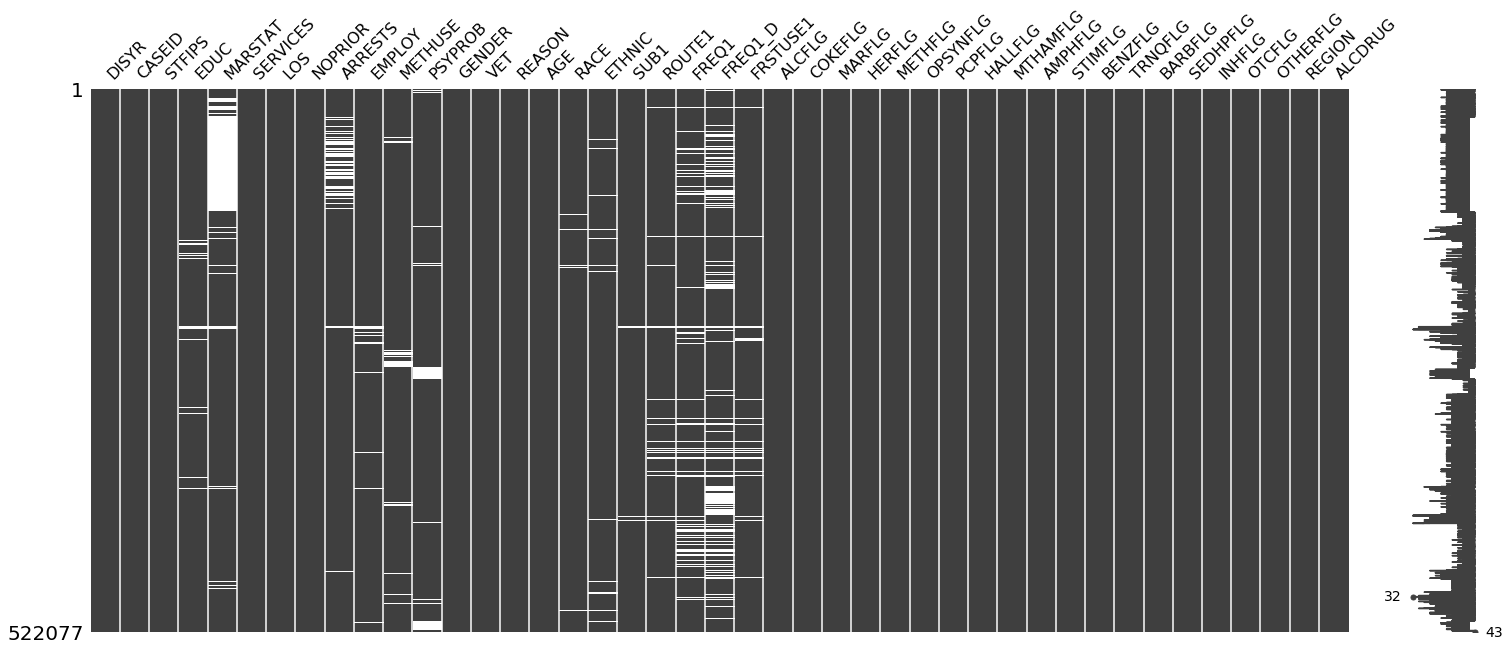

In [26]:
#Drop variable completely
def drop_var(df,var):
    df = df.drop(var,axis=1)
    return df

npt_veterans_c = drop_var(npt_veterans_c,'DAYWAIT')
npt_veterans_c = drop_var(npt_veterans_c,'DSMCRIT')


msno.matrix(npt_veterans_c)